In [1]:
import cv2
import numpy as np

# 컬러 영상 다루기

## 컬러 영상의 픽셀값 참조

In [11]:
src = cv2.imread('./data/butterfly.jpg', cv2.IMREAD_COLOR)
src.shape

# 좌상단 (0, 0) 좌표의 값
b = src[0, 0, 0]  # B channel 값을 가져옴
g = src[0, 0, 1]  # G channel 값을 가져옴
r = src[0, 0, 2]  # R channel 값을 가져옴
print(b, g, r)

cv2.imshow('src', src)
cv2.waitKey()
cv2.destroyAllWindows()

47 88 50


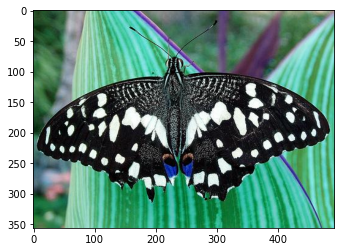

In [14]:
import matplotlib.pyplot as plt  
plt.imshow(src)

[참고] matplotlib의 backend 지정

In [ ]:
%matplotlib inline  # matplotlib의 default backend: inline

In [17]:
# matplotlib의 backend를 qt로 사용하면 픽셀의 좌표와 RGB를 표시해줌
%matplotlib qt
plt.imshow(src)

## 컬러 영상의 픽셀값 반전

## numpy 100 검색해서 numpy 문제 풀기

In [28]:
src = cv2.imread('./data/butterfly.jpg', cv2.IMREAD_COLOR)
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY) # 색공간 변화

cv2.imshow('src', src)
cv2.imshow('gray', gray)
cv2.waitKey()
cv2.destroyAllWindows()

## 색공간 변환

In [26]:
src = cv2.imread('./data/butterfly.jpg', cv2.IMREAD_COLOR)

dst = src.copy()

# option 1
dst = 255 - src

# option 2
# dst[:, :, 0] = 255 - src[:, :, 0]
# dst[:, :, 1] = 255 - src[:, :, 1]
# dst[:, :, 2] = 255 - src[:, :, 2]

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()

## 색상 채널 나누기

**BGR -> HSV**

In [22]:
src = cv2.imread('./data/butterfly.jpg', cv2.IMREAD_COLOR)
hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV) # 색공간 변화

h, s, v = cv2.split(hsv)

cv2.imshow('src', src)
cv2.imshow('h', h)
cv2.imshow('s', s)
cv2.imshow('v', v)
cv2.waitKey()
cv2.destroyAllWindows()

**BGR -> YCRCB**

In [24]:
src = cv2.imread('./data/butterfly.jpg', cv2.IMREAD_COLOR)
YCrCb = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb) # 색공간 변화

y, Cr, Cb = cv2.split(YCrCb)

cv2.imshow('src', src)
cv2.imshow('y', y)
cv2.imshow('Cr', Cr)
cv2.imshow('Cb', Cb)
cv2.waitKey()
cv2.destroyAllWindows()

In [30]:
(y == gray).sum()

175502

In [31]:
y.size 

175508

In [43]:
src = cv2.imread('./data/candies.png', cv2.IMREAD_COLOR)

b, g, r = cv2.split(src)

cv2.imshow('src', src)
cv2.imshow('b', b)
cv2.imshow('g', g)
cv2.imshow('r', r)
cv2.waitKey()
cv2.destroyAllWindows()

# 컬러 영상 처리 기법

## 컬러 히스토그램 평활화

In [36]:
# 명암비를 조정한다는것은 "밝기"값하고만 상관이 있음
src = cv2.imread("./data/pepper.bmp")
src_yCrCb = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb) # YCrCb : Y(밝기 정보), Cr(붉은색 색상정보), Cb(푸른색 색상정보)

y, Cr, Cb = cv2.split(src_yCrCb)

y_equalized = cv2.equalizeHist(y) # 밝기 정보만을 담고 있는 y 채널에 대해서만 평활화를 수행

dst_yCrCb = cv2.merge([y_equalized, Cr, Cb])

dst = cv2.cvtColor(dst_yCrCb, cv2.COLOR_YCrCb2BGR)

cv2.imshow("src", src)
cv2.imshow("dst", dst)
cv2.waitKey()
cv2.destroyAllWindows()

## 색상 범위 지정에 의한 영역 분할

**B, G, R 값의 구간 조정하여 영역 분할**

In [ ]:
def on_level_change(pos):
    lower_b = cv2.getTrackbarPos('lower b', 'dst')
    upper_b = cv2.getTrackbarPos('upper b', 'dst')
    lower_g = cv2.getTrackbarPos('lower g', 'dst')
    upper_g = cv2.getTrackbarPos('upper g', 'dst')
    lower_r = cv2.getTrackbarPos('lower r', 'dst')
    upper_r = cv2.getTrackbarPos('upper r', 'dst')
    
    # blue m&m (rgb): 0, 114, 236
    # start point
    # lower = (220, 100, 0)
    # upper = (250, 120, 10)
    
    lower = (lower_b, lower_g, lower_r)
    upper = (upper_b, upper_g, upper_r)

    dst = cv2.inRange(src, lower, upper)
    cv2.imshow('dst', dst)
    
src = cv2.imread('./data/candies.png')

cv2.imshow("src", src)
cv2.imshow("dst", dst)

cv2.createTrackbar('lower b', 'dst', 0, 255, on_level_change)
cv2.createTrackbar('upper b', 'dst', 0, 255, on_level_change)

cv2.createTrackbar('lower g', 'dst', 0, 255, on_level_change)
cv2.createTrackbar('upper g', 'dst', 0, 255, on_level_change)

cv2.createTrackbar('lower r', 'dst', 0, 255, on_level_change)
cv2.createTrackbar('upper r', 'dst', 0, 255, on_level_change)

cv2.waitKey()
cv2.destroyAllWindows()

**H, S, V 값의 구간 조정하여 영역 분할**

In [ ]:
# 초록색 m&m 초콜릿 영역만 분할
# hsv

# jcpicker tool 기준
# h: 128
# s: 81
# v: 76

# OpenCV 기준
# h: 64
# s: 206
# v: 193

In [48]:
def on_level_change(pos):
    lower_h = cv2.getTrackbarPos('lower h', 'dst')
    upper_h = cv2.getTrackbarPos('upper h', 'dst')
    lower_s = cv2.getTrackbarPos('lower s', 'dst')
    upper_s = cv2.getTrackbarPos('upper s', 'dst')
    lower_v = cv2.getTrackbarPos('lower v', 'dst')
    upper_v = cv2.getTrackbarPos('upper v', 'dst')
    
    lower = (lower_h, lower_s, lower_v)
    upper = (upper_h, upper_s, upper_v)

    dst = cv2.inRange(hsv, lower, upper)
    cv2.imshow('dst', dst)
    
src = cv2.imread('./data/candies.png')
hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

cv2.imshow("src", src)
cv2.imshow("dst", dst)

cv2.createTrackbar('lower h', 'dst', 0, 255, on_level_change)
cv2.createTrackbar('upper h', 'dst', 0, 255, on_level_change)

cv2.createTrackbar('lower s', 'dst', 0, 255, on_level_change)
cv2.createTrackbar('upper s', 'dst', 0, 255, on_level_change)

cv2.createTrackbar('lower v', 'dst', 0, 255, on_level_change)
cv2.createTrackbar('upper v', 'dst', 0, 255, on_level_change)
cv2.waitKey()
cv2.destroyAllWindows()

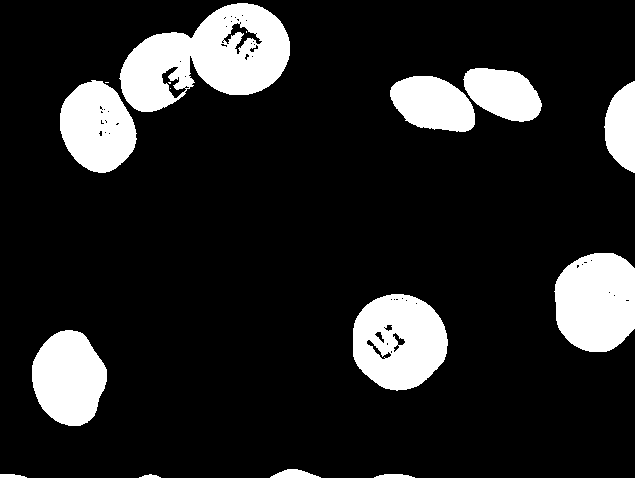

## 히스토그램 역투영

In [49]:
src = np.array([[0, 0, 0, 0],
                [1, 1, 3, 5],
                [6, 1, 1, 3],
                [4, 3, 1, 7]], dtype=np.uint8)

hist = cv2.calcHist(images=[src], channels=[0], mask=None, histSize=[4], ranges=[0, 8])
hist

array([[9.],
       [3.],
       [2.],
       [2.]], dtype=float32)

In [50]:
backP = cv2.calcBackProject([src], [0], hist, [0, 8], scale=1)
backP

array([[9, 9, 9, 9],
       [9, 9, 3, 2],
       [2, 9, 9, 3],
       [2, 3, 9, 2]], dtype=uint8)

In [56]:
ref = cv2.imread('./data/ref.png')
mask = cv2.imread('./data/mask.bmp', cv2.IMREAD_GRAYSCALE)
src = cv2.imread('./data/kids.png')

ref_yCrCb = cv2.cvtColor(ref, cv2.COLOR_BGR2YCrCb)
src_yCrCb = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)


channels = [1, 2]  # Cr, Cb channel
histSize = [128, 128]
ranges = [0, 256] + [0, 256]

hist = cv2.calcHist(images=[ref_yCrCb], channels=channels, mask=mask, histSize=histSize, ranges=ranges)
# hist.shape: 128, 128

back_proj = cv2.calcBackProject([src_yCrCb], channels, hist, ranges, scale=1)

cv2.imshow('ref', ref)
cv2.imshow('mask', mask)
cv2.imshow('src', src)
cv2.imshow('back_proj',back_proj)
cv2.waitKey()
cv2.destroyAllWindows()

# 영상의 이진화

## 전역 이진화

In [57]:
def on_threshold(pos):
    _ , dst = cv2.threshold(src, pos, 255, cv2.THRESH_BINARY)
    cv2.imshow("dst", dst)

src = cv2.imread('./data/neutrophils.png', cv2.IMREAD_GRAYSCALE)
dst = src.copy()

cv2.imshow("src", src)
cv2.imshow("dst", dst)

cv2.createTrackbar("threshold", "dst", 0, 255, on_threshold)
cv2.setTrackbarPos("threshold", "dst", 128)

cv2.waitKey()
cv2.destroyAllWindows()

* Otsu 알고리즘에 의한 임계값 사용

In [58]:
src = cv2.imread('./data/neutrophils.png', cv2.IMREAD_GRAYSCALE)

thresh, dst = cv2.threshold(src, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
print(thresh)

cv2.imshow("src", src)
cv2.imshow("dst", dst)
cv2.waitKey()
cv2.destroyAllWindows()

206.0


* Otsu 알고리즘에 의한 임계값 사용 (heart10.jpg)

In [60]:
src = cv2.imread('./data/heart10.jpg', cv2.IMREAD_GRAYSCALE)

thresh, dst = cv2.threshold(src, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
print(thresh)

cv2.imshow("src", src)
cv2.imshow("dst", dst)
cv2.waitKey()
cv2.destroyAllWindows()

175.0


## 적응형 이진화

In [62]:
src = cv2.imread('./data/sudoku.jpg', cv2.IMREAD_GRAYSCALE)
thresh, dst = cv2.threshold(src, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
print(thresh)

cv2.imshow("src", src)
cv2.imshow("dst", dst)
cv2.waitKey()
cv2.destroyAllWindows()

97.0


In [71]:
def on_trackbar(pos):
    b_size = pos
    if b_size % 2 == 0:  # 짝수
        b_size += 1
    if b_size < 3:
        b_size = 3
        
    C = 5

    dst = cv2.adaptiveThreshold(src, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, b_size, C)
    cv2.imshow('dst', dst)
src = cv2.imread('./data/sudoku.jpg', cv2.IMREAD_GRAYSCALE)

dst = src.copy()

cv2.imshow("src", src)
cv2.imshow("dst", dst)

cv2.createTrackbar('block size', 'dst', 0, 200, on_trackbar)
cv2.setTrackbarPos('block size', 'dst', 5)

cv2.waitKey()
cv2.destroyAllWindows()